In [12]:
import numpy as np
import healpy as hp
import pys2let as s2let
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
file = '../example_data/haslam408_dsds_Remazeilles2014.fits'

In [4]:
hpx_map = hp.read_map(file,verbose=False)


First construct a band-limited version of the original map.

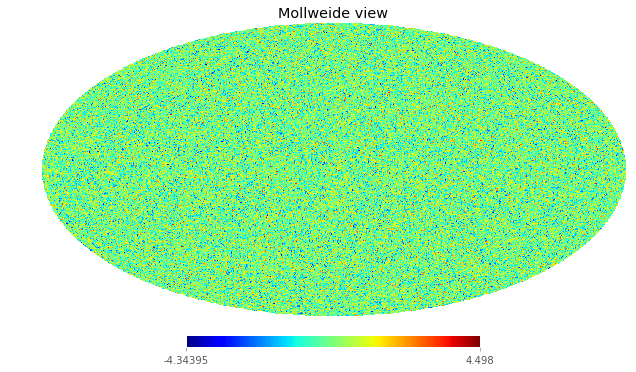

In [188]:
nside = 128
lmax= 500
hpx_map = np.random.randn(hp.nside2npix(nside))
hp.mollview(hpx_map)

In [189]:
hpx_map_alm = hp.map2alm(hpx_map, lmax=lmax-1)
hpx_bl = hp.alm2map(hpx_map_alm,nside=nside,lmax=lmax-1,verbose=False)

Define the wavelet parameters $B$, $J$:

In [190]:
B = 3
J_min = 1
J = s2let.pys2let_j_max(B,lmax,J_min)

In [191]:
map_wav_lm, map_scal_lm = s2let.analysis_axisym_lm_wav(hpx_map_alm, B, lmax, J_min)

In [192]:
map_scal = hp.alm2map(map_scal_lm,nside=nside,lmax=lmax-1,verbose=False)
map_wav = [hp.alm2map(wav_lm.ravel(),nside=nside,lmax=lmax-1,verbose=False) for wav_lm in np.rollaxis(map_wav_lm,1)]

In [193]:
hpx_map_rec_lm = s2let.synthesis_axisym_lm_wav(map_wav_lm, map_scal_lm,B,lmax,J_min)
hpx_map_rec = hp.alm2map(hpx_map_rec_lm,nside=nside,lmax=lmax-1,verbose=False)

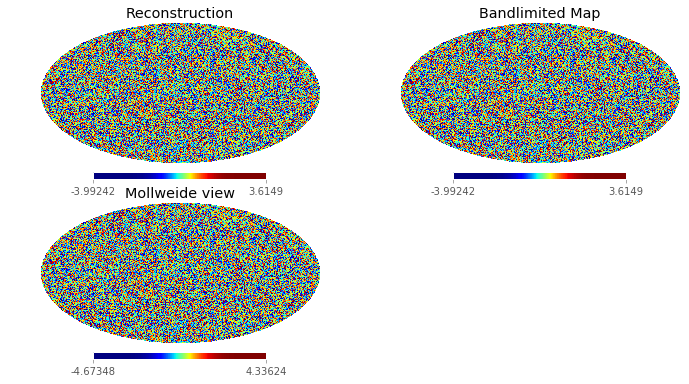

In [205]:
fig = plt.figure(figsize=(10,5))
hp.mollview(np.sum(map_wav,axis=0)+map_scal,norm='hist',sub=(223))
hp.mollview(hpx_map_rec,norm='hist',sub=(221),fig=fig,title='Reconstruction')
hp.mollview(hpx_bl,norm='hist',sub=(222),fig=fig,title='Bandlimited Map')

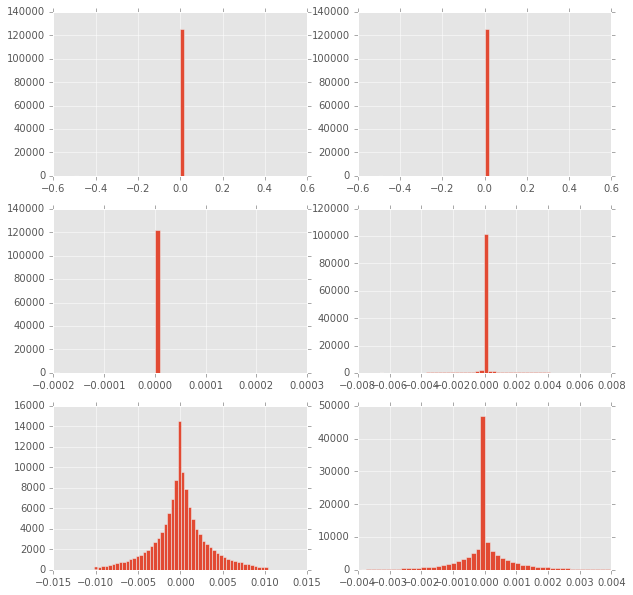

In [195]:
fig,axes = plt.subplots(3,2,figsize=(10,10))
for p,ax in zip(np.rollaxis(map_wav_lm,1),axes.ravel()):
    histo = ax.hist(p,bins=50,range=[np.percentile(p,1),np.percentile(p,99)])

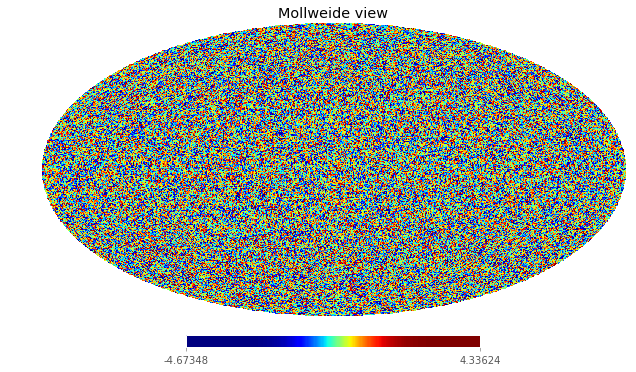